### Learning objective

The objective of this chapter is to understand

- Understand what is a dataframe and how to work with pandas dataframe.
- How to load data onto dataframes and apply transformations like filtering, grouping, ordering and joining of dataframes
- Drawing statistical plots like barplot, histogram, distribution plot, box plot, scatter plot, pair plot and heatmaps for finding insights


## Working with DataFrames

- Data scientists deal with structured data in most of their data analysis activities and are very familiar with the concept of SQL table. 
- The similar structure of presenting data is supported in python through dataframes, which can be imagined as in-memory sql tables. 



- The dataframes are flat in structure and is arranged in rows and columns. 
- Rows are indexed and columns can be named. 
- Each row is also referred as sample or observation, whereas columns are also referred as features.

<img src="dataframe.png" width="500">

### Exploring IPL Dataset

- The Indian Premier League (IPL) was a professional league for Twenty20 (T20) cricket championships that was started in 2008 in India. 
- The first IPL auction was held in 2008 and the franchises acquired players through an auction that was conducted every year. 
- The performance of 130 players played in at least one season of the IPL (2008 - 2011) measured through various performance metrics along with the base price and sold price is given in the dataset **IPL IMB381IPL2013.csv**. 

| Data Code | Data Type | Description |
| ----------:| :-------------- | :-------------- |
| AGE |	Categorical | Age of the player at the time of auction classified into 3 categories.  Category 1  (L25) means the player is less than 25 years old, 2 means that the age is between 25 and 35 years (B25-35)and category 3 means that the age is more than 35 (A35).  |
| RUNS-S | Continuous | Number of runs scored by a player |
| RUNS-C | Continuous | Number of runs conceded by a player |
| HS | Continuous |	Highest score by a batsman in IPL |
| AVE-B | Continuous | Average runs scored by a batsman in IPL |
| AVE-BL | Continuous |	Bowling average (Number of runs conceded / number of wickets taken) in IPL. |
| SR-B | Continuous | Batting strike rate (ratio of the number of runs scored to the number of balls faced) in IPL |
| SR-BL | Continuous | Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL |
| SIXERS | Continuous |	Number of six runs scored by a player in IPL  |
| WKTS | Continuous | Number of wickets taken by a player in IPL |
| ECON | Continuous | Economy rate of a bowler (number of runs conceded by the bowler per over) in IPL |
| CAPTAINCY EXP | Categorical | Captained either an T20 team or a national team |
| ODI-SR-B | Continuous | Batting strike rate in One Day Internationals |
| ODI-SR-BL | Continuous | Bowling strike rate in One Day Internationals |
| ODI-RUNS-S | Continuous | Runs scored in One Day Internationals |
| ODI-WKTS | Continuous | Wickets taken in One Day Internationals |
| T-RUNS-S | Continuous | Runs scored in Test matches |
| T-WKTS | Continuous | Wickets taken in Test matches |
| PLAYER-SKILL | Categorical | Player’s primary skill (batsman, bowler, or all-rounder) |
| COUNTRY | Categorical | Country of origin of the player (AUS: Australia; IND: India; PAK: Pakistan; SA: South Africa; SL: Sri Lanka; NZ: New Zealand; WI: West Indies; OTH: Other countries) |
| YEAR-A | Categorical | Year of Auction in IPL |
| IPL TEAM | Categorical | Team(s) for which the player had played in the IPL (CSK: Chennai Super Kings; DC: Deccan Chargers; DD: Delhi Daredevils; KXI: Kings XI Punjab; KKR: Kolkata Knight Riders; MI: Mumbai Indians; PWI: Pune Warriors India; RR: Rajasthan Royals; RCB: Royal Challengers Bangalore). A + sign was used to indicate that the player had played for more than one team. For example, CSK+ would mean that the player had played for CSK as well as for one or more other teams.  |

### Loading the dataset onto a DataFrame

In [72]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 7)  

Pandas library has provided methods for loading datasets with many different formats onto dataframes. For example, 

- **read_csv** to read comma separated values
- **read_json** to read data with json format
- **read_fwf** to read data with fixed width format
- **read_excel** to read excel files
- **read_table** to read database tables

In [73]:
pd.read_csv?

<img src="read_csv.png" width="1000">

- The read_csv api expects paramter *delimiter* to be set to appropriate delimiter character. The default is comma.
- It also assumes the first line to be the header. if not, the  and *header* parameter need to be set to *False*.

In [74]:
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' )

The returned variable *ipl_auction_df* is a dataframe.

In [75]:
type(ipl_auction_df)

pandas.core.frame.DataFrame

### Displaying first few records of the DataFrame

In [76]:
ipl_auction_df.head(5)

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


### Finding metadata of the DataFrame

In [7]:
list(ipl_auction_df.columns)

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'BASE PRICE',
 'SOLD PRICE']

we can also display the dataframe by transposing, especially if the number of columns are many.

In [8]:
ipl_auction_df.head(5).transpose()

,0,1,2,3,4
Sl.NO.,1,2,3,4,5
PLAYER NAME,"Abdulla, YA",Abdur Razzak,"Agarkar, AB","Ashwin, R","Badrinath, S"
AGE,2,2,2,1,2
COUNTRY,SA,BAN,IND,IND,IND
TEAM,KXIP,RCB,KKR,CSK,CSK
PLAYING ROLE,Allrounder,Bowler,Bowler,Bowler,Batsman
T-RUNS,0,214,571,284,63
T-WKTS,0,18,58,31,0
ODI-RUNS-S,0,657,1269,241,79
ODI-SR-B,0.000,71.410,80.620,84.560,45.930


The dimension of the dataframe can be retrived through the *shape* attribute of the dataframe.

In [9]:
ipl_auction_df.shape

(130, 26)

As we can see the IPL dataset contains 130 records and 26 columns.

More detailed metadata about the dataset like number of records, columns names, number of actual populated values in each column and datatypes of columns and total memory consumption by the dataframe can be retrieved using *info()* method of the dataframe. 

In [10]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

- None of the columns have any missing values. 
- The data type of the columns are automatically inferred by pandas 
- Most of the continuous variables are shown as either int64 or float64 and categorical variables(strings or literals) are inferred as objects.

### Slicing and Indexing a dataframe

#### Selecting Rows by Indexes

Showing the first 5 rows of the dataframe.

In [11]:
ipl_auction_df[0:5]

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


Showing the last five records.

In [12]:
ipl_auction_df[-5:]

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,...,2010,50000,750000
126,127,Younis Khan,2,...,2008,225000,225000
127,128,Yuvraj Singh,2,...,2011,400000,1800000
128,129,Zaheer Khan,2,...,2008,200000,450000
129,130,"Zoysa, DNT",2,...,2008,100000,110000


#### Selecting Columns by Column Names

In [13]:
ipl_auction_df['PLAYER NAME'][0:5]

0     Abdulla, YA
1    Abdur Razzak
2     Agarkar, AB
3       Ashwin, R
4    Badrinath, S
Name: PLAYER NAME, dtype: object

In [14]:
ipl_auction_df[['PLAYER NAME', 'COUNTRY']][0:5]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


#### Selecting Rows and Columns by indexes

In [77]:
ipl_auction_df.iloc[4:9, 1:4]

,PLAYER NAME,AGE,COUNTRY
4,"Badrinath, S",2,IND
5,"Bailey, GJ",2,AUS
6,"Balaji, L",2,IND
7,"Bollinger, DE",2,AUS
8,"Botha, J",2,SA


### Value Counts and Cross Tabulations

#### Finding occurances of each values in columns

How many players from each country took part in auction?

In [16]:
ipl_auction_df.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64

As expected, most players auctioned are from India, followed by Australia and then South Africa.

Passing parameter *normalize=True* to the *value_counts()* will calculate the percentage of each unique value.


In [17]:
ipl_auction_df.COUNTRY.value_counts(normalize=True)*100

IND   40.769
AUS   16.923
SA    12.308
SL     9.231
PAK    6.923
NZ     5.385
WI     4.615
ENG    2.308
BAN    0.769
ZIM    0.769
Name: COUNTRY, dtype: float64

#### Cross-tabulation between two columns

What is the age of the players auctioned for different playing roles?

Age of the player at the time of auction are classified into 3 categories.  
- Category 1 means the player is less than 25 years old, 
- Category 2 means that the age is between 25 and 35 years and category 
- Category 3 means that the age is more than 35. 

In [18]:
pd.crosstab( ipl_auction_df['AGE'], ipl_auction_df['PLAYING ROLE'] )

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


Most of the players auctioned are from the age category 2.

### Sorting dataframe by column values

Sorting players by their sold price.

In [19]:
ipl_auction_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE')[0:5]

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000


To sort the dataframe records in ascending order, pass *False* to *ascending* parameter.

In [20]:
ipl_auction_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending = False)[0:5]

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


### Creating new columns

#### Which player got the maximum premium on the base price?

The premium need to be calculated by taking difference between the *SOLD PRICE* and *BASE PRICE*.

In [21]:
ipl_auction_df['premium'] = ipl_auction_df['SOLD PRICE'] - ipl_auction_df['BASE PRICE']

In [22]:
ipl_auction_df[['PLAYER NAME', 'BASE PRICE', 'SOLD PRICE', 'premium']][0:5]

,PLAYER NAME,BASE PRICE,SOLD PRICE,premium
0,"Abdulla, YA",50000,50000,0
1,Abdur Razzak,50000,50000,0
2,"Agarkar, AB",200000,350000,150000
3,"Ashwin, R",100000,850000,750000
4,"Badrinath, S",100000,800000,700000


#### Which players got the maximum premium offering on their base price?

In [23]:
ipl_auction_df[['PLAYER NAME', 
                'BASE PRICE', 
                'SOLD PRICE', 'premium']].sort_values('premium',
                                                      ascending = False)[0:5]

,PLAYER NAME,BASE PRICE,SOLD PRICE,premium
50,"Kohli, V",150000,1800000,1650000
113,"Tiwary, SS",100000,1600000,1500000
127,Yuvraj Singh,400000,1800000,1400000
111,"Tendulkar, SR",400000,1800000,1400000
93,"Sehwag, V",400000,1800000,1400000


The result shows Virat Kohli was auctioned with maximum premium on the base price demanded.

### Grouping and Aggregating

#### What is the average SOLD PRICE for each age category?

In [24]:
ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean()

AGE
1   720250.000
2   484534.884
3   520178.571
Name: SOLD PRICE, dtype: float64

The average prices is highest for age category 1 and lowest for age category 2. 

The above operation returns a *pd.Series* structure. To create a dataframe, call reset_index() as shown below.

In [25]:
soldprice_by_age = ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
soldprice_by_age

,AGE,SOLD PRICE
0,1,720250.000
1,2,484534.884
2,3,520178.571


#### Average SOLD PRICE for Different Playing Roles in Each Age Category?

The groupby() can take list of multiple column names to group records.

In [26]:
soldprice_by_age_role = ipl_auction_df.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()
soldprice_by_age_role

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Allrounder,587500.000
1,1,Batsman,1110000.000
2,1,Bowler,517714.286
3,2,Allrounder,449400.000
4,2,Batsman,654761.905
5,2,Bowler,397931.034
6,2,W. Keeper,467727.273
7,3,Allrounder,766666.667
8,3,Batsman,457692.308
9,3,Bowler,414375.000


### Joining dataframes

To join two dataframes, call *merge()* function on one of the dataframe and pass the other dataframe as a parameter. It also takes the column names on which it has be joined and the join type.

Dataframes can be joined on multiple columns and the join type can be of **inner, outer, left or right joins**. 

#### Compare the average auction price for different ages and playing roles.

We will join the above two dataframes created and then compare the difference in auction prices.

In [83]:
soldprice_comparison = soldprice_by_age_role.merge( soldprice_by_age, 
                                                   on = 'AGE', 
                                                   how = 'inner')

In [84]:
soldprice_comparison

,AGE,PLAYING ROLE,SOLD PRICE_x,SOLD PRICE_y
0,1,Allrounder,587500.000,720250.000
1,1,Batsman,1110000.000,720250.000
2,1,Bowler,517714.286,720250.000
3,2,Allrounder,449400.000,484534.884
4,2,Batsman,654761.905,484534.884
5,2,Bowler,397931.034,484534.884
6,2,W. Keeper,467727.273,484534.884
7,3,Allrounder,766666.667,520178.571
8,3,Batsman,457692.308,520178.571
9,3,Bowler,414375.000,520178.571


### Re-naming columns

In [85]:
soldprice_comparison.rename( columns = { 'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE',
                               'SOLD PRICE_y': 'SOLD_PRICE_AGE' }, inplace = True  )

In [86]:
soldprice_comparison.head(5)

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE
0,1,Allrounder,587500.000,720250.000
1,1,Batsman,1110000.000,720250.000
2,1,Bowler,517714.286,720250.000
3,2,Allrounder,449400.000,484534.884
4,2,Batsman,654761.905,484534.884


### Applying Operations to multiple columns

#### Percentage change in SOLD PRICE

In [87]:
soldprice_comparison['change'] = soldprice_comparison.apply(lambda rec: 
                        (rec.SOLD_PRICE_AGE_ROLE - rec.SOLD_PRICE_AGE) / rec.SOLD_PRICE_AGE, 
                        axis = 1)

In [32]:
soldprice_comparison

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE,change
0,1,Allrounder,587500.000,720250.000,-0.184
1,1,Batsman,1110000.000,720250.000,0.541
2,1,Bowler,517714.286,720250.000,-0.281
3,2,Allrounder,449400.000,484534.884,-0.073
4,2,Batsman,654761.905,484534.884,0.351
5,2,Bowler,397931.034,484534.884,-0.179
6,2,W. Keeper,467727.273,484534.884,-0.035
7,3,Allrounder,766666.667,520178.571,0.474
8,3,Batsman,457692.308,520178.571,-0.120
9,3,Bowler,414375.000,520178.571,-0.203


### Filtering Records from Dataframe based on conditions

#### Which players have hit more then 80 sixes in the IPL tournament so far?

In [33]:
ipl_auction_df[ipl_auction_df['SIXERS'] > 80 ][['PLAYER NAME', 'SIXERS']]

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


### Removing a column

To remove a column or a rows, call *drop()* method on the dataframe. It takes a parameter *axis* to specify if a column or a row need to be dropped. 

- To drop a column, pass the column name and axis as 1. 
- To drop a row, pass the row index and axis as 0. 

We will drop the column *SI.NO.* in the IPL dataset as we do not need this column for our exploration.

In [34]:
ipl_auction_df.drop( 'Sl.NO.', inplace = True, axis = 1)

In [35]:
ipl_auction_df.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE', 'premium'],
      dtype='object')

## Exploration using Visualization Plots

###  Drawing Plots

- *Matplotlib* is a library for creating 2D plots of arrays in Python. 
- *Seaborn*, which is built on top of matplotlib and provides high level APIs for rendering high quality plots.

In [88]:
import matplotlib.pyplot as plt
import seaborn as sn

### Bar Plot

Bar chart is a frequency chart for qualitative variable (or categorical variable).

To display the average sold price by each age category, pass *SOLD PRICE* as *y* parameter and *AGE* as *x* parameter.

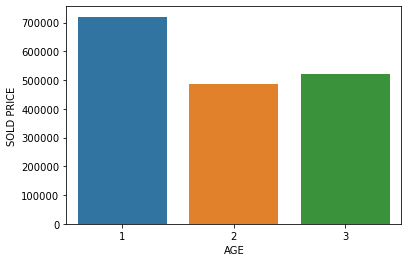

In [48]:
sn.barplot(x = 'AGE', y = 'SOLD PRICE', data = sold`price_by_age);

- The bar plot shows the average sold price for age category 1 is highest and age category 2 lowest.

- We can also create bar plots which can be further sub-grouped by a third category. 
- For examples, average sold price by each age category but grouped by playing roles. 
- The parameter *hue* takes the third category as parameter i.e. *PLAYING ROLE*.

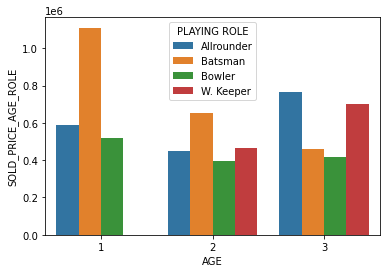

In [49]:
sn.barplot(x = 'AGE', y = 'SOLD_PRICE_AGE_ROLE', hue = 'PLAYING ROLE', data = soldprice_comparison);

It can be noted that in the age category 1 and 2, batsmen are paid maximum, whereas allrounders are paid maximum in the age category 3. This could be because the genuine allrounders have established their credentials over a period of time.

### Histogram

- A **histogram** is a plot that shows the frequency distribution of a continuous variable. 
- Historam gives an insight into the underlying distribution (e.g., normal distribution) of the variable. We will explore more about distributions in the coming week.

- To draw a histogram for *SOLD PRICE* and understand it's distribution.

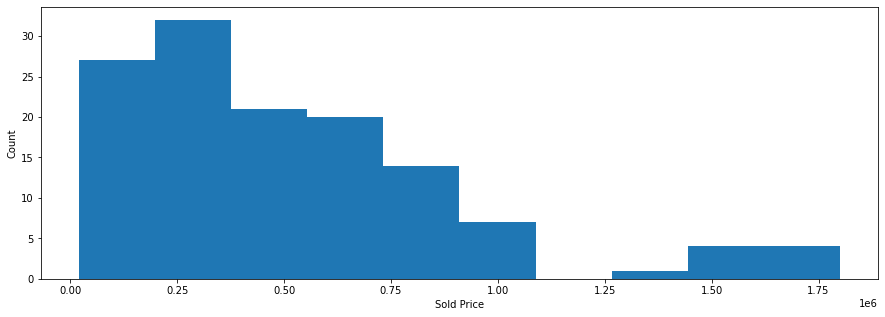

In [92]:
plt.figure(figsize=(15, 5))
plt.hist( ipl_auction_df['SOLD PRICE'] );
plt.xlabel( "Sold Price" )
plt.ylabel( "Count" );

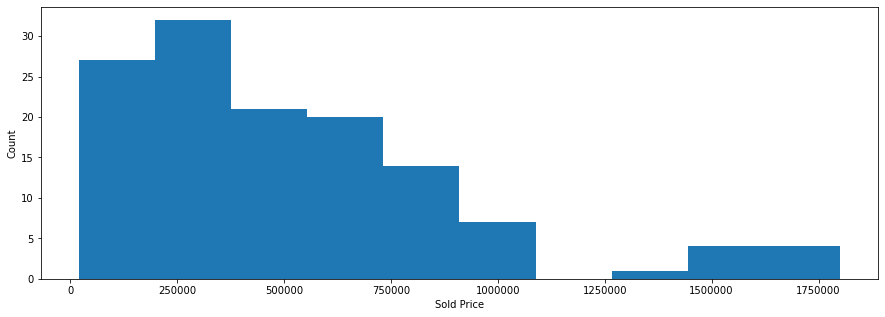

In [104]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.hist( ipl_auction_df['SOLD PRICE'] );
plt.xlabel( "Sold Price" )
plt.ylabel( "Count" );

The histogram shows *SOLD PRICE* is right skewed. Most players are auctioned at low price range of 250000 and 500000, whereas there are few players who are paid very highly like more than 1 million doallars. 

- By default it creates 10 bins in the histogram. 
- To create more bins, the bins parameter can be set in the *hist()* method as shown below example.

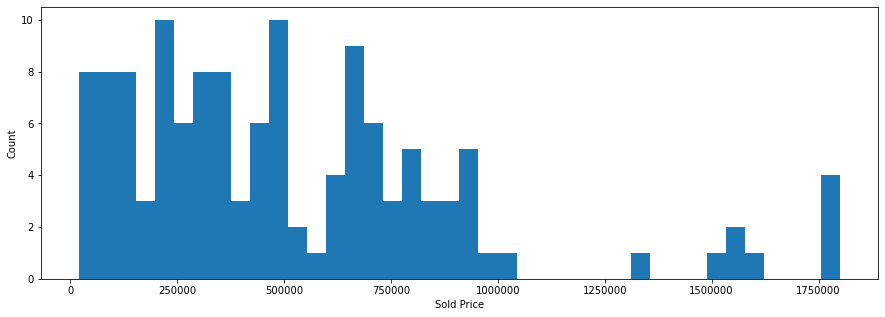

In [105]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.hist( ipl_auction_df['SOLD PRICE'], bins = 40 );
plt.xlabel( "Sold Price" )
plt.ylabel( "Count" );

We can notice multiple peaks in the plot i.e around 250k, 500k and 700k. Number of players sold around those prices are high.

### Distribution or Density plot

A **Distribution or Density** plot depicts the distribution of data over a continuous interval. 

It also gives insight into what might be the distrubution shape of the population.

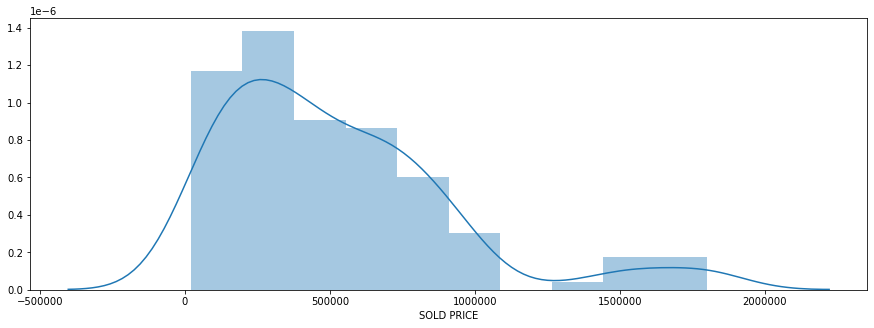

In [106]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
sn.distplot( ipl_auction_df['SOLD PRICE'] );

### Box Plot

Box plot is a graphical representation of numerical data that can be used to understand the variability of the data and the existence of outliers.

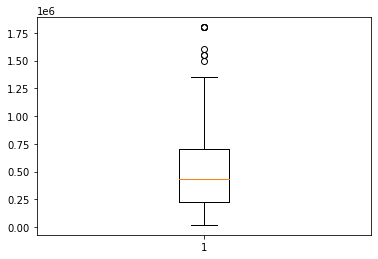

In [110]:
box = plt.boxplot(ipl_auction_df['SOLD PRICE']);

Box plot is designed by following insights:

- First Quartile or lower quartile - first 25% percent of data lies between min and 1st quartile.
- Second quartile - second 25% percent of data lies between 1st quartile and median value.
- Third quartile - third 25% of data between median and third quartile.
- Fourth quartile - Last 25% of data.

- The length of the box is equivalent to IQR (Inter Quartile Range). i.e. (Q3 - Q1) 
The box plot estimates that caps i.e. min and max values of the distribution lies between Q1 – 1.5IQR and Q3 + 1.5IQR; observations beyond these two limits are potential outliers.  

We can obtain these values from the plot as well.

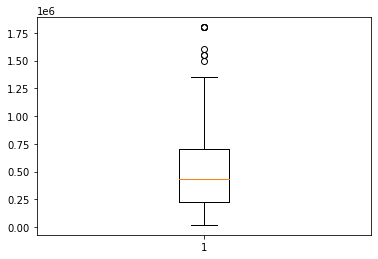

In [113]:
box = plt.boxplot(ipl_auction_df['SOLD PRICE']);

In [116]:
[item.get_ydata()[0] for item in box['medians']]

[437500.0]

In [55]:
[item.get_ydata()[0] for item in box['caps']]

[20000.0, 1350000.0]

In [56]:
[item.get_ydata()[0] for item in box['whiskers']]

[225000.0, 700000.0]

So, inter-quartile range (IQR) is 700,000 - 225,000 = 475,000.

#### Who are outliers?

The boxplot shows some of the players are auctioned at *SOLD PRICE*, which seems to be outliers. Let's find out the players.

In [58]:
ipl_auction_df[ipl_auction_df['SOLD PRICE'] > 1350000.0][['PLAYER NAME', 
                                                          'PLAYING ROLE', 
                                                          'SOLD PRICE']]

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


#### Comparing Distributions

The distribution for different categories can be compared by overlapping the distributions. 

For example, Does *CAPTAINCY EXP* influence *SOLD PRICE* of players.

#### Using distribution plots

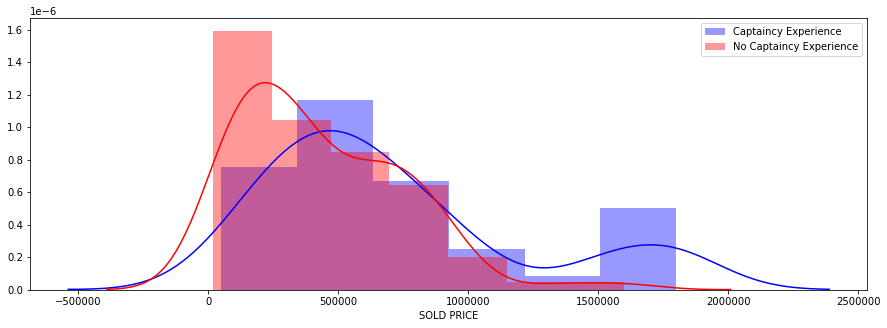

In [119]:
plt.figure(figsize=(15, 5))
sn.distplot( ipl_auction_df[ipl_auction_df['CAPTAINCY EXP'] == 1]['SOLD PRICE'], 
            color = 'b', 
            label = 'Captaincy Experience')
sn.distplot( ipl_auction_df[ipl_auction_df['CAPTAINCY EXP'] == 0]['SOLD PRICE'], 
            color = 'r', 
            label = 'No Captaincy Experience');
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.legend();

It can be observed that players with captaincy experience seem to be paid higher.

#### Using box plots

An example of comparing the *SOLD PRICE* for players with different *PLAYING ROLE*.

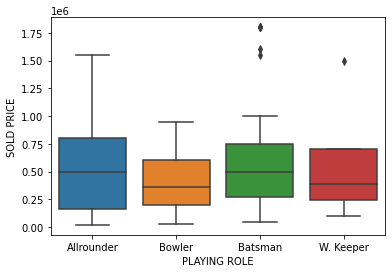

In [60]:
sn.boxplot(x = 'PLAYING ROLE', y = 'SOLD PRICE', data = ipl_auction_df);

Few observations from the above plot are,
- The median SOLD PRICE for Allrounders and batsman are higher then bowler and Wicket Keepers.
- There are outliers in batsman and wicket keeper category.

### Scatter Plot

Scatter plot can depict the relationship between two continuous variables. 

Scatter plots are used during regression model building to decide on the initial model, that is whether to include a variable in a regression model or not. We will explore that in the future sessions.

Since IPL is T20 cricket, it is believed that number of sixers a player has hit in past would have impact on his SOLD PRICE. A scatter plot between *SOLD PRICE* of batsman and number of sixes he has hit can verify this correlation.

In [61]:
ipl_batsman_df = ipl_auction_df[ipl_auction_df['PLAYING ROLE'] == 'Batsman']

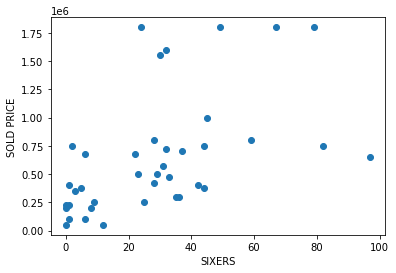

In [120]:
plt.scatter(x = ipl_batsman_df.SIXERS,
            y = ipl_batsman_df['SOLD PRICE']);
plt.xlabel('SIXERS')
plt.ylabel('SOLD PRICE');

To draw the direction of relationship between the variables, *regplot()* of seaborn can be used.

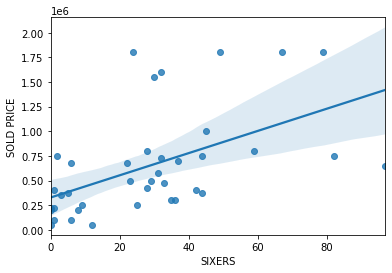

In [121]:
sn.regplot( x = 'SIXERS', 
            y = 'SOLD PRICE', 
            data = ipl_batsman_df );

### Pair Plot

- If there are many variables, it is not convenient to draw scatter plots for each pair of variables to understand the relationships. 
- A heatmap can depict the pairwise relationship between many variables.
- We will explore the relationship of four variables *'SR-B', 'AVE', 'SIXERS', 'SOLD PRICE'*.

In [122]:
influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE']

Actual correlation values can be computed using *corr()* method o the dataframe and rendered using a heatmap.

In [123]:
ipl_auction_df[influential_features].corr()

,SR-B,AVE,SIXERS,SOLD PRICE
SR-B,1.000,0.584,0.425,0.184
AVE,0.584,1.000,0.705,0.397
SIXERS,0.425,0.705,1.000,0.451
SOLD PRICE,0.184,0.397,0.451,1.000


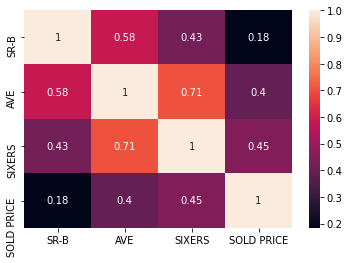

In [124]:
sn.heatmap(ipl_auction_df[influential_features].corr(), annot=True);

The color map scale is shown along the heatmap. Setting *annot* to true also prints the correlation values in each box of the heatmp and improves readability of the heatmap. Here the heatmap shows *AVE* and *SIXER* are stongly correlated, while *SOLD PRICE* and *SR-B* are not so strongly correlated.

## What we learnt:

- Descriptive analytics is simple comprehension of data using data summarization, basic statistical measures and visualization.
- Dataframes are widely used data structures for loading and manipulating structured data.
- *Pandas* library provides excellent support for working with dataframe.
- *Matplotlib* and *Seaborn* are two most widely used libraries for creating plots. 
- Plots like histogram, distribution plots, box plots, scatter plot and heatmap can be created to find insights during exploratory analysis.